In [2]:
# Import the necessary libraries

import pickle
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import time

from google.colab import drive
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms
from torch.optim import lr_scheduler
from PIL import Image
from collections import Counter
import torch.nn.functional as F
from torchvision import models

In [3]:
# Connects to drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [5]:
# Set the device to GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [12]:
history = torch.load('/content/raining_historyResNet1205.pth', map_location = torch.device('cpu'))
history2 = torch.load('/content/training_history0105.pth', map_location = torch.device('cpu'))

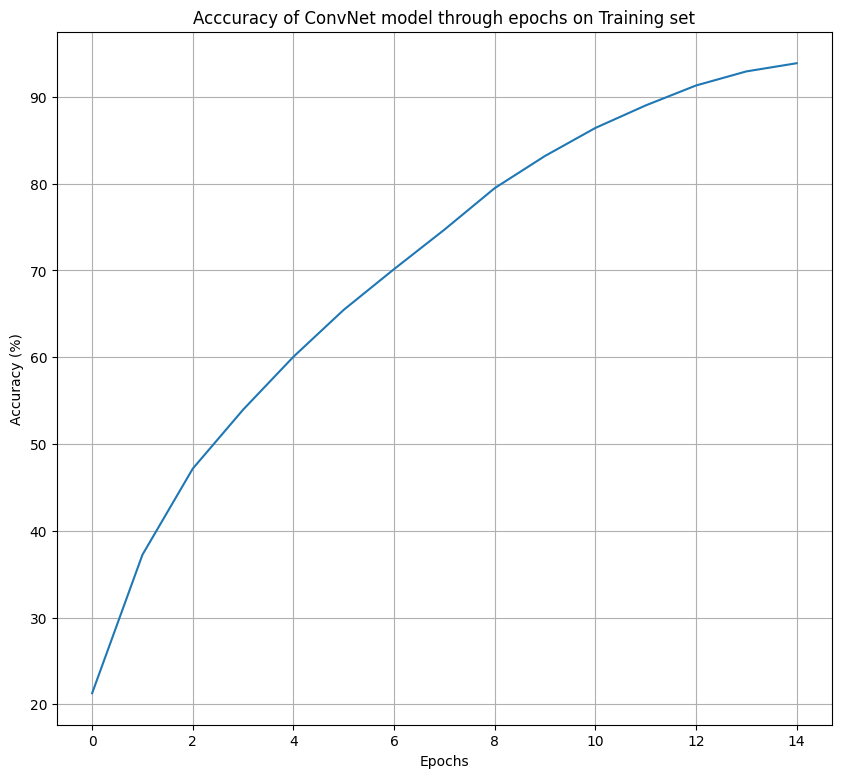

In [31]:
# Plots the accuracy of ConvNet by epoch

accuracies = np.array(history2['accuracy']) * 100

plt.figure(figsize = (10, 9))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Acccuracy of ConvNet model through epochs on Training set')
plt.plot(accuracies)
plt.savefig('convnetaccuracy.png')

In [ ]:

labels_path = '/content/MyDrive/MyDrive/ECSE551-MP1/Train_labels.xlsx' # Change the path so that it connects to your working folder
train_path = '/content/MyDrive/MyDrive/ECSE551-MP1/Train.pkl' # Change the path so that it connects to your working folder

classes = pd.read_excel(labels_path, index_col = 0)
with open(train_path, 'rb') as f:
    data = pickle.load(f) # Loads the training data

In [ ]:

# Preprocess function for data augmentation
def preprocess(new_size, data):
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((new_size, new_size)), # Increases image size
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
    ])

    augmented_data = []
    for img in data:
        img = np.squeeze(img)  # Remove single channel dimension
        augmented_data.append(transform(img))

    return torch.stack(augmented_data)


new_size = 56 # Initializes new image side length

In [17]:
classes.head() # gives an overview of samples' classes

NameError: ignored

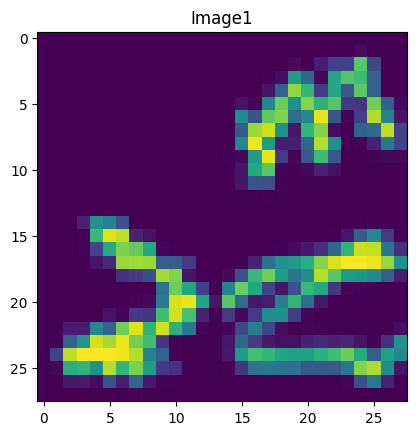

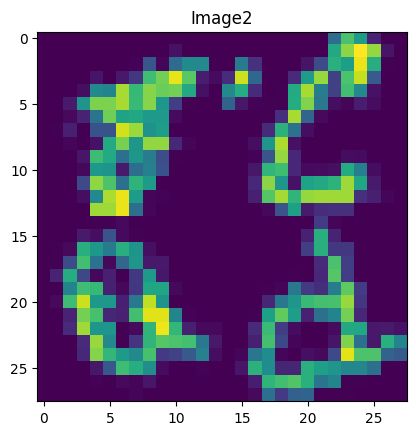

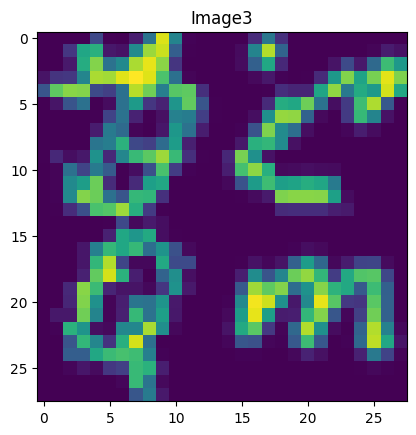

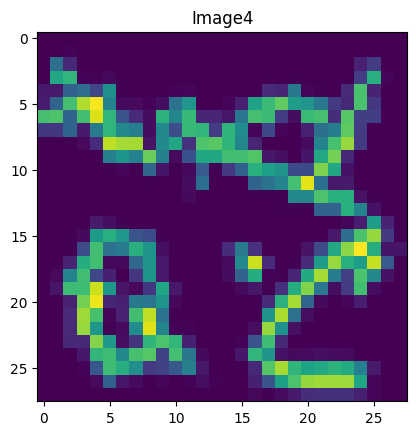

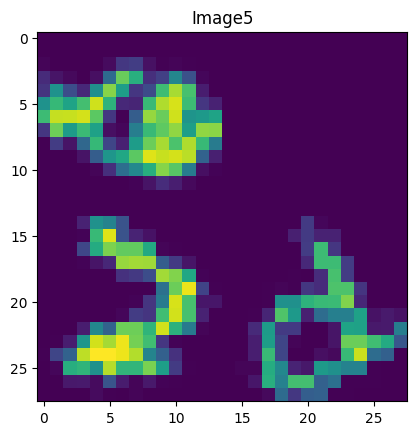

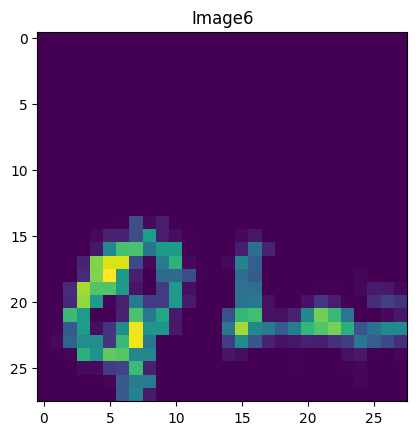

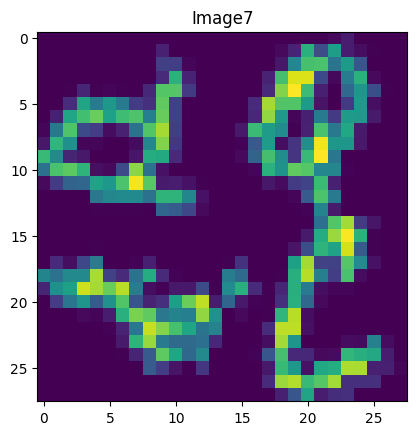

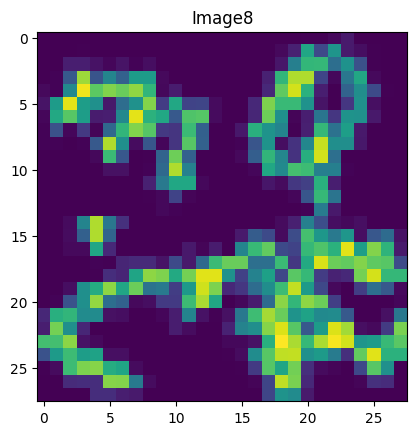

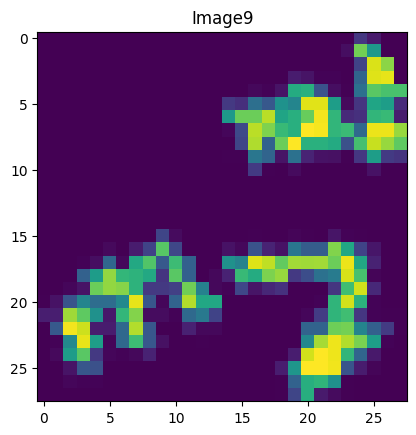

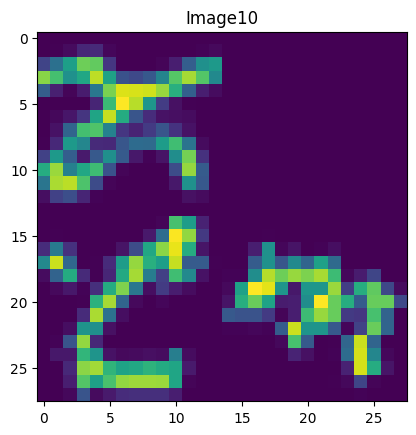

In [ ]:
# Preview of the 10 first images

for i in range(len(data) // 6000):
    image = data[i,:,:,:].T
    plt.imshow(image)
    plt.title(f'Image{i + 1}')
    plt.show()

In [ ]:
#ConvNet model

modelV2 = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(),
    nn.Linear(32 * (new_size // 4) * (new_size // 4), 128),
    nn.ReLU(),
    nn.Linear(128, 10)  # Assuming 10 classes (0 to 9)
)

In [100]:
sum(runtime_res)

365.6005172729492

In [ ]:
# Xavier/Glorot Initialization
def init_weights(m):
    if type(m) == nn.Conv2d or type(m) == nn.Linear:
        nn.init.xavier_normal_(m.weight)

In [ ]:
def ResidualBlock(in_channels, out_channels, stride=1):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True)
    )

# Define the ResNet Model
ResNet = nn.Sequential(
    # Initial Convolution
    nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.BatchNorm2d(64),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1),

    # Residual Blocks
    ResidualBlock(64, 64),
    ResidualBlock(64, 64),

    ResidualBlock(64, 128, stride=2),
    ResidualBlock(128, 128),

    # Global Average Pooling
    nn.AdaptiveAvgPool2d(1),
    nn.Flatten(),

    # Fully Connected Layers
    nn.Linear(128, 10)  # Assuming 10 output classes
)


ResNet.apply(init_weights)

Sequential(
  (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (5): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps

In [ ]:
inputs, labels = preprocess(new_size, data), torch.tensor(classes['class'].values)
dataset = TensorDataset(inputs, labels)

In [ ]:
bins = len(classes['class'].unique())

,class
id,
1,8
2,7
3,0
4,1
5,4
...,...
59996,4
59997,9
59998,0


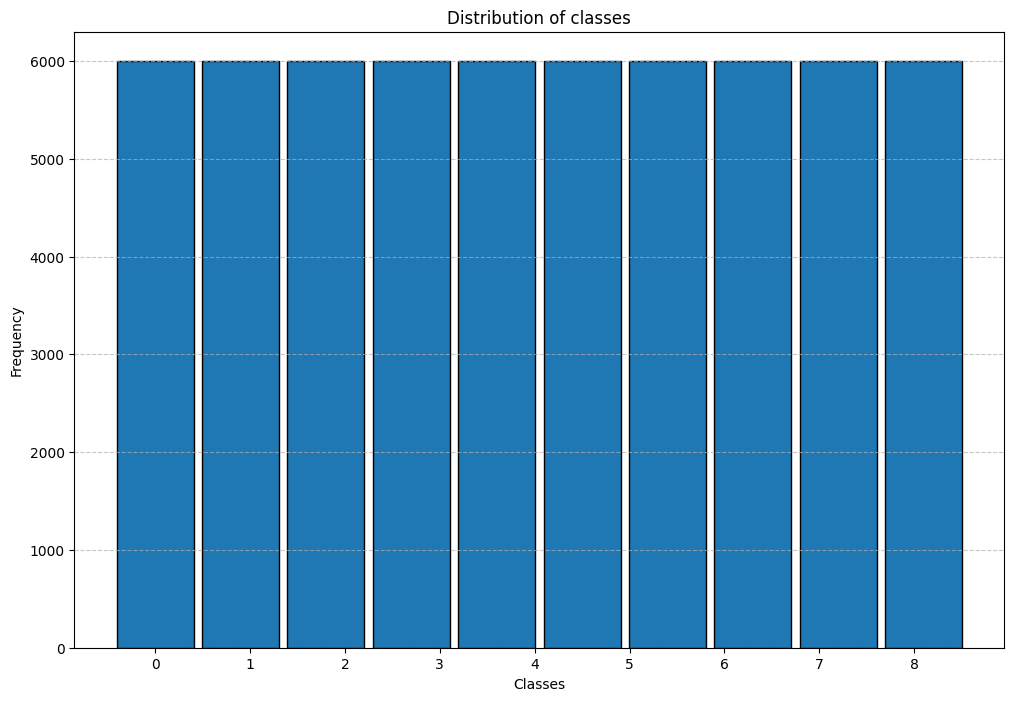

In [ ]:
# Plots the distributiion

plt.figure(figsize = (12, 8))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(np.arange(min(classes['class']), max(classes['class'])+1, 1.0))
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.hist(classes['class'].values, edgecolor='black', rwidth = 0.9, align = 'left')
plt.savefig('classes.png')

In [ ]:
# Initializes hyperparameters for ResNet model

step_size = 5
gamma = 0.1
error = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ResNet.parameters(), lr = 0.001, momentum = 0.9)
epochs = 30
batch_size = 64
data_loader = DataLoader(dataset,
                         batch_size = batch_size,
                         shuffle = True,
                         num_workers = 2
                         )

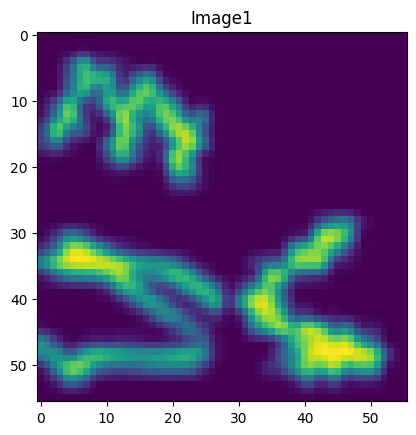

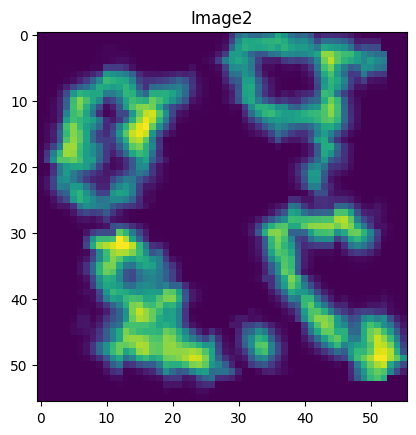

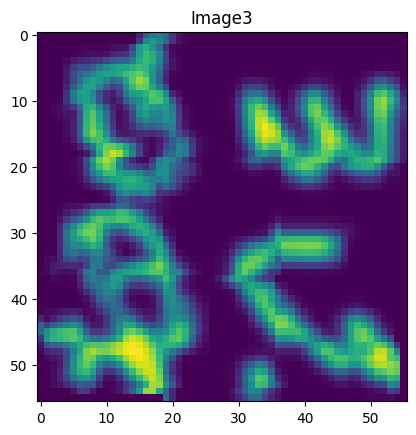

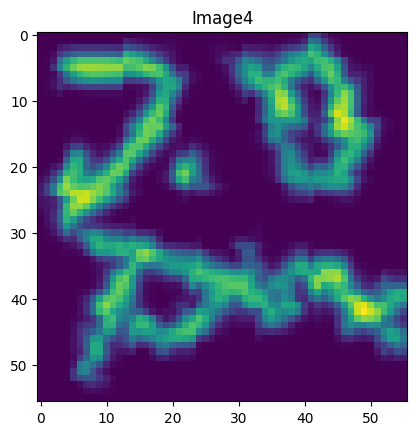

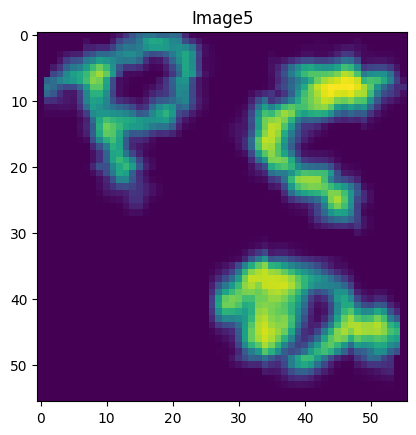

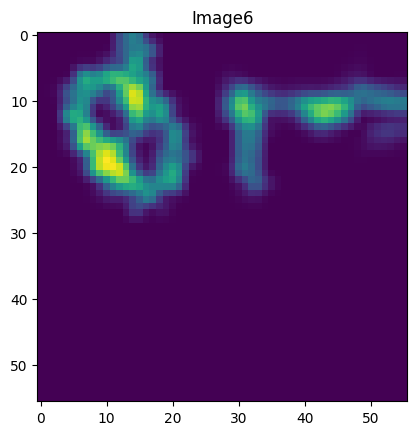

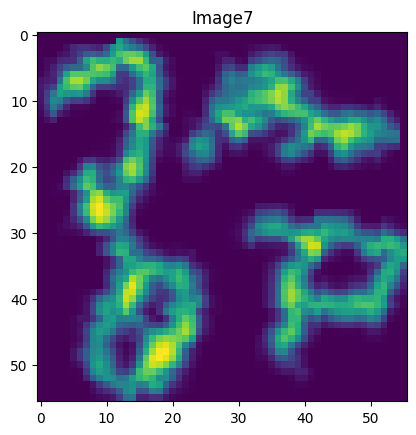

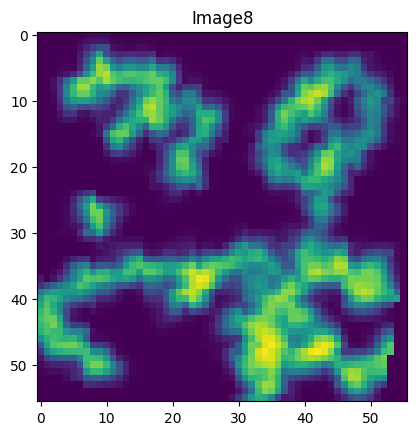

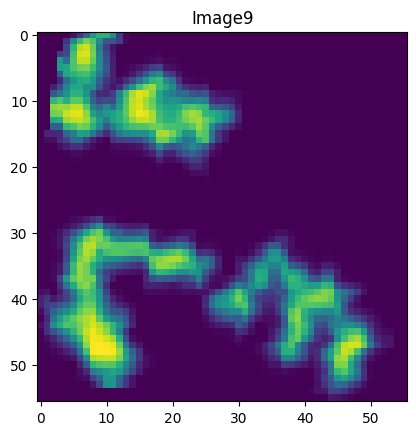

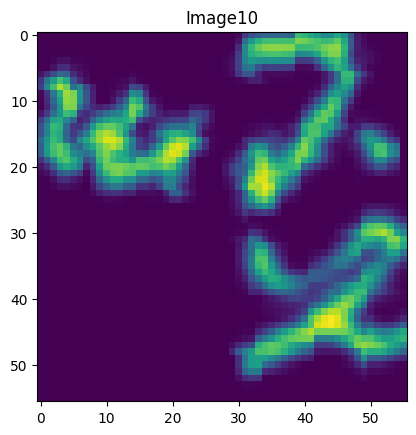

In [ ]:
new_images = inputs.numpy()

# Preview of the 10 first images

for i in range(len(new_images) // 6000):
    image = new_images[i,:,:,:].T
    plt.imshow(image)
    plt.title(f'Image{i + 1}')
    plt.show()

In [ ]:
|# Training loop for ConvNet
train_loss_history = []
train_accuracy_history = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelV2.to(device)


for epoch in range(epochs):
    total_correct = 0
    total_samples = 0
    total_loss = 0

    for input, label in data_loader:
        input, label = input.to(device), label.to(device)
        outputs = modelV2(input)
        loss = error(outputs, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = outputs.max(1)
        total_samples += label.size(0)
        total_correct += (predicted == label).sum().item()

    accuracy = total_correct / total_samples
    average_loss = total_loss / len(data_loader)

    train_loss_history.append(average_loss)
    train_accuracy_history.append(accuracy)

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}')

Epoch [1/15], Loss: 2.0916, Accuracy: 0.2129
Epoch [2/15], Loss: 1.7343, Accuracy: 0.3724
Epoch [3/15], Loss: 1.5019, Accuracy: 0.4717
Epoch [4/15], Loss: 1.3199, Accuracy: 0.5395
Epoch [5/15], Loss: 1.1572, Accuracy: 0.6005
Epoch [6/15], Loss: 1.0070, Accuracy: 0.6546
Epoch [7/15], Loss: 0.8639, Accuracy: 0.7015
Epoch [8/15], Loss: 0.7313, Accuracy: 0.7470
Epoch [9/15], Loss: 0.5939, Accuracy: 0.7948
Epoch [10/15], Loss: 0.4839, Accuracy: 0.8319
Epoch [11/15], Loss: 0.3868, Accuracy: 0.8642
Epoch [12/15], Loss: 0.3134, Accuracy: 0.8901
Epoch [13/15], Loss: 0.2475, Accuracy: 0.9131
Epoch [14/15], Loss: 0.2030, Accuracy: 0.9293
Epoch [15/15], Loss: 0.1741, Accuracy: 0.9388


In [ ]:
# Training loop for ResNet



train_loss_history_res = []
train_accuracy_history_res = []
runtime_res = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ResNet.to(device)



for epoch in range(epochs):
    total_correct = 0
    total_samples = 0
    total_loss = 0

    start = time.time()
    for input, label in data_loader:
        input, label = input.to(device), label.to(device)
        outputs = ResNet(input)
        loss = error(outputs, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = outputs.max(1)
        total_samples += label.size(0)
        total_correct += (predicted == label).sum().item()


    end = time.time()
    t = end - start
    accuracy = total_correct / total_samples
    average_loss = total_loss / len(data_loader)

    train_loss_history_res.append(average_loss)
    train_accuracy_history_res.append(accuracy)
    runtime_res.append(t)

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}, Runtime : {t:.4f}')

Epoch [1/20], Loss: 1.7319, Accuracy: 0.3811, Runtime : 21.0471
Epoch [2/20], Loss: 1.1860, Accuracy: 0.6056, Runtime : 17.4361
Epoch [3/20], Loss: 0.8819, Accuracy: 0.7143, Runtime : 17.6200
Epoch [4/20], Loss: 0.7103, Accuracy: 0.7726, Runtime : 17.6929
Epoch [5/20], Loss: 0.6012, Accuracy: 0.8081, Runtime : 17.8801
Epoch [6/20], Loss: 0.5210, Accuracy: 0.8337, Runtime : 18.1079
Epoch [7/20], Loss: 0.4574, Accuracy: 0.8528, Runtime : 18.1779
Epoch [8/20], Loss: 0.4035, Accuracy: 0.8710, Runtime : 18.1555
Epoch [9/20], Loss: 0.3587, Accuracy: 0.8854, Runtime : 18.2005
Epoch [10/20], Loss: 0.3141, Accuracy: 0.8983, Runtime : 18.3313
Epoch [11/20], Loss: 0.2783, Accuracy: 0.9096, Runtime : 19.3517
Epoch [12/20], Loss: 0.2459, Accuracy: 0.9204, Runtime : 18.1059
Epoch [13/20], Loss: 0.2157, Accuracy: 0.9295, Runtime : 18.2260
Epoch [14/20], Loss: 0.1902, Accuracy: 0.9386, Runtime : 17.8487
Epoch [15/20], Loss: 0.1627, Accuracy: 0.9486, Runtime : 18.4141
Epoch [16/20], Loss: 0.1459, Accur

In [ ]:
# Loads test images

test_path = '/content/MyDrive/MyDrive/ECSE551-MP1/Test.pkl'
with open(test_path, 'rb') as f:
    X_test = pickle.load(f)

In [ ]:
# Loads testing images into a tensor
X_test_tensor = preprocess(new_size, X_test)

In [ ]:
#Checking past accuracies
pastaccu = torch.load('training_historyResNet1205.pth')
pastaccu.keys()

odict_keys(['0.weight', '0.bias', '1.weight', '1.bias', '1.running_mean', '1.running_var', '1.num_batches_tracked', '4.0.weight', '4.0.bias', '4.1.weight', '4.1.bias', '4.1.running_mean', '4.1.running_var', '4.1.num_batches_tracked', '4.3.weight', '4.3.bias', '4.4.weight', '4.4.bias', '4.4.running_mean', '4.4.running_var', '4.4.num_batches_tracked', '5.0.weight', '5.0.bias', '5.1.weight', '5.1.bias', '5.1.running_mean', '5.1.running_var', '5.1.num_batches_tracked', '5.3.weight', '5.3.bias', '5.4.weight', '5.4.bias', '5.4.running_mean', '5.4.running_var', '5.4.num_batches_tracked', '6.0.weight', '6.0.bias', '6.1.weight', '6.1.bias', '6.1.running_mean', '6.1.running_var', '6.1.num_batches_tracked', '6.3.weight', '6.3.bias', '6.4.weight', '6.4.bias', '6.4.running_mean', '6.4.running_var', '6.4.num_batches_tracked', '7.0.weight', '7.0.bias', '7.1.weight', '7.1.bias', '7.1.running_mean', '7.1.running_var', '7.1.num_batches_tracked', '7.3.weight', '7.3.bias', '7.4.weight', '7.4.bias', '7.4.r

In [ ]:
ResNet.eval()

 # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation during inference
    X_test_tensor = X_test_tensor.to(device)
    y = ResNet(X_test_tensor)

# Convert the outputs to probabilities using softmax
probs = torch.nn.functional.softmax(y, dim=1)

# Get the predicted class (the one with the maximum probability)
_, predictions = torch.max(probs, 1)

# Convert predictions to a NumPy array

predictions = predictions.cpu().numpy()

In [ ]:
# Define the DenseNet model
class DenseNetModel(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(DenseNetModel, self).__init__()
        self.densenet = torch.hub.load('pytorch/vision:v0.9.0', 'densenet121')
        # Modify the first layer to accept grayscale images
        self.densenet.features[0] = nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        # Modify the classifier layer to match the number of classes
        self.densenet.classifier = nn.Linear(self.densenet.classifier.in_features, num_classes)

    def forward(self, x):
        return self.densenet(x)

In [ ]:
# Initializes a DenseNet model and its hyperparameters

dense = DenseNetModel(in_channels=1, num_classes=10).to(device)
dense.apply(init_weights)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dense.parameters(), lr=0.001)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0


In [ ]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [ ]:
# Training loop for DenseNet model

train_loss_history_dense = []
train_accuracy_history_dense = []
runtime_dense = []

for epoch in range(epochs):
    start = time.time()

    # Training
    dense.train()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for input, label in data_loader:
        input, label = input.to(device), label.to(device)
        optimizer.zero_grad()
        outputs = dense(input)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == label).sum().item()
        total_samples += label.size(0)

    end = time.time()
    t = end - start
    average_loss = total_loss / len(data_loader)
    accuracy = correct_predictions / total_samples
    train_loss_history_dense.append(average_loss)
    train_accuracy_history_dense.append(accuracy)
    runtime_dense.append(t)

    # Print and save results for each epoch
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}, '
          f'Time: {t:.2f} seconds')

Epoch [1/30], Loss: 1.5443, Accuracy: 0.4554, Time: 77.45 seconds
Epoch [2/30], Loss: 0.8474, Accuracy: 0.7242, Time: 76.38 seconds
Epoch [3/30], Loss: 0.6321, Accuracy: 0.7986, Time: 77.09 seconds
Epoch [4/30], Loss: 0.5278, Accuracy: 0.8323, Time: 75.17 seconds
Epoch [5/30], Loss: 0.4423, Accuracy: 0.8589, Time: 76.96 seconds
Epoch [6/30], Loss: 0.4028, Accuracy: 0.8726, Time: 75.04 seconds
Epoch [7/30], Loss: 0.3130, Accuracy: 0.8976, Time: 75.90 seconds
Epoch [8/30], Loss: 0.2723, Accuracy: 0.9120, Time: 75.08 seconds
Epoch [9/30], Loss: 0.3208, Accuracy: 0.8988, Time: 74.43 seconds
Epoch [10/30], Loss: 0.2025, Accuracy: 0.9349, Time: 72.64 seconds
Epoch [11/30], Loss: 0.1767, Accuracy: 0.9420, Time: 72.71 seconds
Epoch [12/30], Loss: 0.1526, Accuracy: 0.9497, Time: 72.27 seconds
Epoch [13/30], Loss: 0.1316, Accuracy: 0.9560, Time: 73.12 seconds
Epoch [14/30], Loss: 0.1179, Accuracy: 0.9596, Time: 72.31 seconds
Epoch [15/30], Loss: 0.0967, Accuracy: 0.9677, Time: 72.61 seconds
Epoc

In [1]:
sum(runtime_dense)

NameError: ignored

In [ ]:
dense.eval()

 # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation during inference
    X_test_tensor = X_test_tensor.to(device)
    y = dense(X_test_tensor)

# Convert the outputs to probabilities using softmax
probs = torch.nn.functional.softmax(y, dim=1)

# Get the predicted class (the one with the maximum probability)
_, predictions = torch.max(probs, 1)

# Convert predictions to a NumPy array

predictions = predictions.cpu().numpy()

In [ ]:
submission = pd.DataFrame({'class' : predictions})
submission.index = [i for i in range(len(predictions))]
submission.index.name = 'id'
submission

,class
id,
0,9
1,9
2,3
3,8
4,3
...,...
9995,9
9996,0
9997,2


In [ ]:
submission.to_csv('predictions1212Dense.csv')

**VGG16**

#HAMZA

In [ ]:
#tutorial architecture


#Pretrained model VGG16:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

class NetVGG(nn.Module):
    def __init__(self):
        super(NetVGG, self).__init__()

        vgg_firstlayer= models.vgg16(pretrained = False).features[0]

        vgg=models.vgg16(pretrained = False).features[1:30]

        # Load the pre-trained VGG16 model

        w1=vgg_firstlayer.state_dict()['weight'][:,0,:,:]
        w2=vgg_firstlayer.state_dict()['weight'][:,1,:,:]
        w3=vgg_firstlayer.state_dict()['weight'][:,2,:,:]
        w4=w1+w2+w3 # add the three weigths of the channels
        w4=w4.unsqueeze(1)# make it 4 dimensional

        first_conv=nn.Conv2d(1, 64, 3, padding = (1,1)) #create a new conv layer
        first_conv.weigth=torch.nn.Parameter(w4, requires_grad=True) #initialize  the conv layer's weigths with w4
        first_conv.bias=torch.nn.Parameter(vgg_firstlayer.state_dict()['bias'], requires_grad=True) #initialize  the conv layer's weigths with vgg's first conv bias

        self.first_convlayer = first_conv
        self.vgg = nn.Sequential(vgg)


        # Replace the last fully connected layer of VGG16 with a custom linear layer
        self.fc1 = nn.Linear(512*7*7, 50)  # Adjust input size based on the output size of the last VGG16 layer

        # The last layer should have an output with the same dimension as the number of classes
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.first_convlayer(x)
        x = self.vgg(x)

        # Global average pooling
        x = F.adaptive_avg_pool2d(x, (7, 7))

        # Flatten for the custom linear layers
        x = x.view(x.size(0), -1)

        # Feedforward layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        # Apply log softmax to the output
        return F.log_softmax(x, dim=1)


network = NetVGG()




step_size = 5
gamma = 0.1
error = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr = 0.01, momentum = 0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size = step_size, gamma = gamma)
epochs = 10
inputs, labels = preprocess(new_size, data), torch.tensor(classes['class'].values)
dataset = TensorDataset(inputs, labels)
batch_size = 32
data_loader = DataLoader(dataset,
                         batch_size = batch_size,
                         shuffle = True,
                         num_workers = 4
                         )


# Training loop

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
network.to(device)

# Training loop
train_loss_history = []
train_accuracy_history = []

for epoch in range(epochs):
    total_correct = 0
    total_samples = 0
    total_loss = 0

    start = time.time()
    for input, label in data_loader:
        input, label = input.to(device), label.to(device)
        outputs = network(input)
        loss = error(outputs, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = outputs.max(1)
        total_samples += label.size(0)
        total_correct += (predicted == label).sum().item()


    end = time.time()
    t = end - start
    accuracy = total_correct / total_samples
    average_loss = total_loss / len(data_loader)

    train_loss_history.append(average_loss)
    train_accuracy_history.append(accuracy)

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


KeyboardInterrupt: ignored

In [ ]:
training_history_ResNet = {'loss': train_loss_history_res, 'accuracy': train_accuracy_history_res}
torch.save(training_history_ResNet, 'training_historyResNet1205.pth')

In [ ]:
torch.save(ResNet.state_dict(), 'training_paramsResNet1205.pth')

In [ ]:
torch.cuda.empty_cache()

In [ ]:
chunk_size = 1000  # Adjust as needed
predictions_list = []
network.eval()

with torch.no_grad():
    for i in range(0, len(X_test_tensor), chunk_size):
        X_chunk = X_test_tensor[i:i+chunk_size]
        X_chunk = X_chunk.to(device)
        y = network(X_chunk)
        probs = torch.nn.functional.softmax(y, dim=1)
        _, predictions = torch.max(probs, 1)
        predictions_list.append(predictions.cpu().numpy())

predictions = np.concatenate(predictions_list)


In [ ]:
predictions

array([3, 4, 3, ..., 9, 2, 3])